<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#k-Nearest-Neighbors" data-toc-modified-id="k-Nearest-Neighbors-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>k-Nearest Neighbors</a></span><ul class="toc-item"><li><span><a href="#kNN-Model-summary" data-toc-modified-id="kNN-Model-summary-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>kNN Model summary</a></span></li></ul></li><li><span><a href="#kNN-with-Scikit-learn" data-toc-modified-id="kNN-with-Scikit-learn-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>kNN with Scikit-learn</a></span><ul class="toc-item"><li><span><a href="#Starting-with-sklearn" data-toc-modified-id="Starting-with-sklearn-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Starting with sklearn</a></span><ul class="toc-item"><li><span><a href="#Apply-model,-make-predictions" data-toc-modified-id="Apply-model,-make-predictions-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Apply model, make predictions</a></span></li><li><span><a href="#Test/evaluate-model" data-toc-modified-id="Test/evaluate-model-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Test/evaluate model</a></span></li></ul></li></ul></li></ul></div>

## k-Nearest Neighbors
We use k-Nearest Neighbors (kNN) as detailed showcase for an ML model, i.e.
* we will not just show how to use it in one of the standard ML packages 
* but discuss in some detail the implementation in Python functions

kNN is conceptually simple:
* need a sample with known classifications
* for new data look at elements from known sample in **neighborhood**
  * requires some metric to define **distance**
* classify according to **majority classification** of these neighbors
  

**Real world example -- elections**  
Elections results, i.e. which party is most popular strongly varies between regions. So if you want to predict how a specific person votes the place where a person lives  and to you know how the neighbors vote provides useful information.

Examples from Bundestagswahl 2017:
* Wahlkreis Jachenau (Bad Tölz) ~62% CSU
* Wahlbezirk Nürnberg-4553 ~45% SPD
* though extreme cases, many "Wahl-Bezirke" rather balanced

Of course other information might be more important to predict voting decision: *education, income, profession, hobbys, ...*


In the following we discuss an example kNN implementation adapted from the book *Data Science from Scratch*

What's needed:
* toy data:
  * artificial poll data of person's programming language preference and geographic location (longitude vs latitude)
* *metric* for distance:
  * simply geographical distance 
* *list of neighbors* sorted by distance
* function to determine *majority vote* of `k-Nearest Neighbors`

***

In [1]:
# the usual setup: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# some artificial poll data of 
# person's programming language preference
# and geographic location (longitue vs latitude)
cities = [(-86.75,33.5666666666667,'Python'),
          (-88.25,30.6833333333333,'Python'),
          (-112.016666666667,33.4333333333333,'Java'),
          (-110.933333333333,32.1166666666667,'Java'),
          (-92.2333333333333,34.7333333333333,'R'),
          (-121.95,37.7,'R'),(-118.15,33.8166666666667,'Python'),
          (-118.233333333333,34.05,'Java'),
          (-122.316666666667,37.8166666666667,'R'),
          (-117.6,34.05,'Python'),
          (-116.533333333333,33.8166666666667,'Python'),
          (-121.5,38.5166666666667,'R'),
          (-117.166666666667,32.7333333333333,'R'),
          (-122.383333333333,37.6166666666667,'R'),
          (-121.933333333333,37.3666666666667,'R'),
          (-122.016666666667,36.9833333333333,'Python'),
          (-104.716666666667,38.8166666666667,'Python'),
          (-104.866666666667,39.75,'Python'),
          (-72.65,41.7333333333333,'R'),
          (-75.6,39.6666666666667,'Python'),(-77.0333333333333,38.85,'Python'),(-80.2666666666667,25.8,'Java'),(-81.3833333333333,28.55,'Java'),(-82.5333333333333,27.9666666666667,'Java'),(-84.4333333333333,33.65,'Python'),(-116.216666666667,43.5666666666667,'Python'),(-87.75,41.7833333333333,'Java'),(-86.2833333333333,39.7333333333333,'Java'),(-93.65,41.5333333333333,'Java'),(-97.4166666666667,37.65,'Java'),(-85.7333333333333,38.1833333333333,'Python'),(-90.25,29.9833333333333,'Java'),(-70.3166666666667,43.65,'R'),(-76.6666666666667,39.1833333333333,'R'),(-71.0333333333333,42.3666666666667,'R'),(-72.5333333333333,42.2,'R'),(-83.0166666666667,42.4166666666667,'Python'),(-84.6,42.7833333333333,'Python'),(-93.2166666666667,44.8833333333333,'Python'),(-90.0833333333333,32.3166666666667,'Java'),(-94.5833333333333,39.1166666666667,'Java'),(-90.3833333333333,38.75,'Python'),(-108.533333333333,45.8,'Python'),(-95.9,41.3,'Python'),(-115.166666666667,36.0833333333333,'Java'),(-71.4333333333333,42.9333333333333,'R'),(-74.1666666666667,40.7,'R'),(-106.616666666667,35.05,'Python'),(-78.7333333333333,42.9333333333333,'R'),(-73.9666666666667,40.7833333333333,'R'),(-80.9333333333333,35.2166666666667,'Python'),(-78.7833333333333,35.8666666666667,'Python'),(-100.75,46.7666666666667,'Java'),(-84.5166666666667,39.15,'Java'),(-81.85,41.4,'Java'),(-82.8833333333333,40,'Java'),(-97.6,35.4,'Python'),(-122.666666666667,45.5333333333333,'Python'),(-75.25,39.8833333333333,'Python'),(-80.2166666666667,40.5,'Python'),(-71.4333333333333,41.7333333333333,'R'),(-81.1166666666667,33.95,'R'),(-96.7333333333333,43.5666666666667,'Python'),(-90,35.05,'R'),(-86.6833333333333,36.1166666666667,'R'),(-97.7,30.3,'Python'),(-96.85,32.85,'Java'),(-95.35,29.9666666666667,'Java'),(-98.4666666666667,29.5333333333333,'Java'),(-111.966666666667,40.7666666666667,'Python'),(-73.15,44.4666666666667,'R'),(-77.3333333333333,37.5,'Python'),(-122.3,47.5333333333333,'Python'),(-89.3333333333333,43.1333333333333,'R'),(-104.816666666667,41.15,'Java')]
#cities = [([longitude, latitude], language) for longitude, latitude, language in cities]


In [3]:
# convert to Dataframe
cols=['long','lat','lang']
citdf=pd.DataFrame(cities,columns=cols)

In [4]:
langs=np.unique(citdf.lang) # get list of languages
print(langs)

['Java' 'Python' 'R']


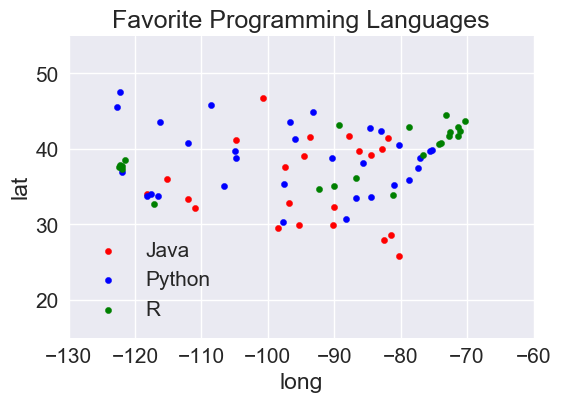

In [66]:
# plot distribution of data
# different color for each language

coldict= { "Java" : "r", "Python" : "b", "R" : "g" }

fig, ax = plt.subplots()

for l in langs:
    citdf[citdf.lang==l].plot.scatter('long','lat',ax=ax,
                                      c=coldict[l],label=l)

plt.legend()
plt.axis([-130,-60,15,55]) # set the axes
plt.title("Favorite Programming Languages");


In [151]:
# helper functions for knn classification
from collections import Counter

def majority_vote(labels):
    """assumes that labels are ordered from nearest to farthest"""
    vote_counts = Counter(labels)
    winner, winner_count = vote_counts.most_common(1)[0]
    num_winners = len([count 
                       for count in vote_counts.values()
                       if count == winner_count])

    if num_winners == 1:
        return winner                     # unique winner, so return it
    else:
        return majority_vote(labels[:-1]) # try again without the farthest


def knn_classify(k, citdf, new_point, exclude_first=True):
    ""
    
    # order the labeled points from nearest to farthest
    
    x,y = new_point
    citdf['dist']=(citdf.long-x)**2+(citdf.lat-y)**2 # calculate distance
    citdfs=citdf.sort_values(['dist']) # sort by distance

    # find the labels for the k closest,
    # exclude index 0 --> identical point
    if exclude_first:
        citdfs=citdfs[1:]
    k_nearest_labels = citdfs.lang[:k].tolist()

    # and let them vote
    return majority_vote(k_nearest_labels)


In [152]:
def test_knn():
    " try several different values for k"
    for k in [1, 3, 5, 7]:
        num_correct = 0
   
        #for location, actual_language in cities:
        for i,l in citdf.iterrows():
            location = (l['long'],l['lat'])

            predicted_language = knn_classify(k, citdf, location)

            if predicted_language == l['lang']: 
                num_correct += 1

        print (k, "neighbor[s]:", num_correct, 
               "correct out of", len(cities))



In [153]:
test_knn()

1 neighbor[s]: 40 correct out of 75
3 neighbor[s]: 44 correct out of 75
5 neighbor[s]: 41 correct out of 75
7 neighbor[s]: 35 correct out of 75


In [169]:
def classify_and_plot_grid(k=1):
    plots = { "Java" : ([], []), "Python" : ([], []), "R" : ([], []) }
#    markers = { "Java" : "o", "Python" : "s", "R" : "^" }
    markers = { "Java" : ".", "Python" : ".", "R" : "." }
    colors  = { "Java" : "r", "Python" : "b", "R" : "g" }

    for longitude in range(-130, -60):
        for latitude in range(20, 55):
            pos = (longitude, latitude)
            predicted_language = knn_classify(k, citdf, pos, False)
            plots[predicted_language][0].append(longitude)
            plots[predicted_language][1].append(latitude)

    # create a scatter series for each language
    for language, (x, y) in plots.items():
        plt.scatter(x, y, color=colors[language], marker=markers[language],
                          label=language, alpha=0.7)

#    plot_state_borders(plt, color='black')    # assume we have a function that does this

    plt.legend(loc=0)          # let matplotlib choose the location
    plt.axis([-130,-60,20,55]) # set the axes
    plt.title(str(k) + "-Nearest Neighbor Programming Languages")


In [ ]:
for i in (1,3,5):
    plt.figure()
    classify_and_plot_grid(i)

### kNN Model summary
* conceptually simple model
  * though distance metric critical
    * not alway as straightforward as in case of geometrical data
* no real training needed
* works also for very localized or non-linear distributions
* no real model
  * evaluation can get slow for large reference data and/or high dimensions
  
***

## kNN with Scikit-learn
In the following we will mainly use ML models and tools from the scikit-learn package.
As a quick example we take our language poll data and apply the kNN model from scikit learn to it.

In [10]:
# extract only long and lat
X = citdf.ix[:,'long':'lat']
Y = citdf.lang
X.shape

(75, 2)

### Starting with sklearn
usual procedure:
- split dataset into training and validation
- select and initialize sklearn model 
- do training
- test/validate


In [11]:
from sklearn.model_selection import train_test_split

In [18]:
train_test_split?

In [24]:
# X_train, X_test, y_train, y_test = train_test_split( X, Y )
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.1 )

# by default 75% train, 25% test
print (X_train.shape, X_test.shape)

(67, 2) (8, 2)


In [29]:
# select kNN model
from sklearn.neighbors import KNeighborsClassifier
# initialize model: parameter n_neighbors
knn = KNeighborsClassifier(n_neighbors=3)
# do the training
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

#### Apply model, make predictions

In [35]:
# create some coordinates
X_new = np.array([[-100,45]])
# 2D format required, nrows vs ncolums (1x2)
X_new.shape #

(1, 2)

In [36]:
knn.predict(X_new) # apply model to new data point

array(['Python'], dtype=object)

#### Test/evaluate model

In [30]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 ['Python' 'Python' 'Java' 'Java' 'Java' 'R' 'R' 'Python']


In [32]:
# test by hand
y_ok = y_pred == y_test
print("Test set score: {:.2f}".format(np.mean(y_ok)))

Test set score: 0.38


In [33]:
# or use equivalent scilearn function for it.
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.38
